### 1 ANALISIS EXPLORATORIO DE DATOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64


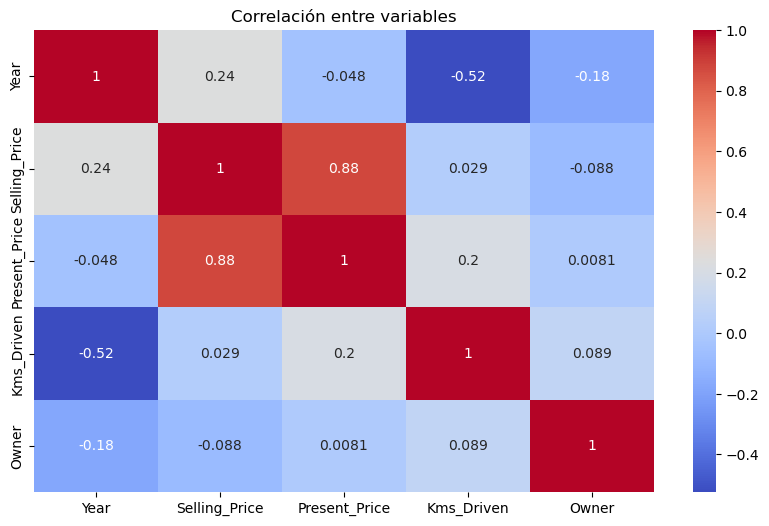

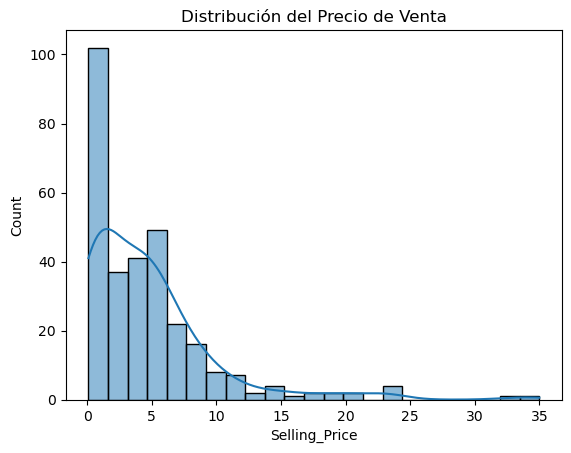

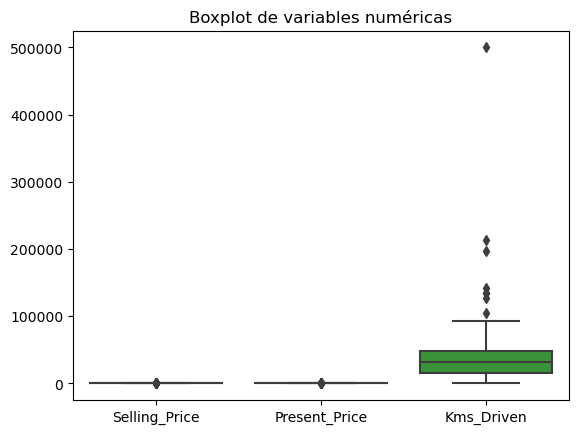

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("car data.csv")

# Información general
df.info()

# Estadísticas descriptivas
df.describe()

# Revisar valores únicos por columna
print(df.nunique())

# Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

# Distribución del precio de venta
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.show()

# Boxplot para detectar outliers
sns.boxplot(data=df[['Selling_Price', 'Present_Price', 'Kms_Driven']])
plt.title('Boxplot de variables numéricas')
plt.show()

### 2 PREPROCESAMIENTO

In [5]:
# Verificar valores nulos
print(df.isnull().sum())

# Transformar variables categóricas usando One Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Mostrar dataframe procesado
df_encoded.head()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


### 3 SELECCIÓN DE CARACTERISTICAS

In [7]:
if 'Car_Name' in df.columns:
    df = df.drop('Car_Name', axis=1)

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Definir X (variables predictoras) e y (variable objetivo)
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Selección automática usando SelectKBest (opcional)
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Visualizar puntuación de cada variable
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))


                  Feature        Score
1           Present_Price  1015.923320
4        Fuel_Type_Diesel   131.264543
6  Seller_Type_Individual   130.164012
5        Fuel_Type_Petrol   123.445920
7     Transmission_Manual    46.577926
0                    Year    17.657642
3                   Owner     2.351956
2              Kms_Driven     0.254931


### 4 DIVIDIR EL DATASET

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5 ENTRENAR EL MODELO

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 6 EVALUAR EL MODELO

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Error Cuadrático Medio (MSE): 3.48
R² Score: 0.85


### RESULTADOS

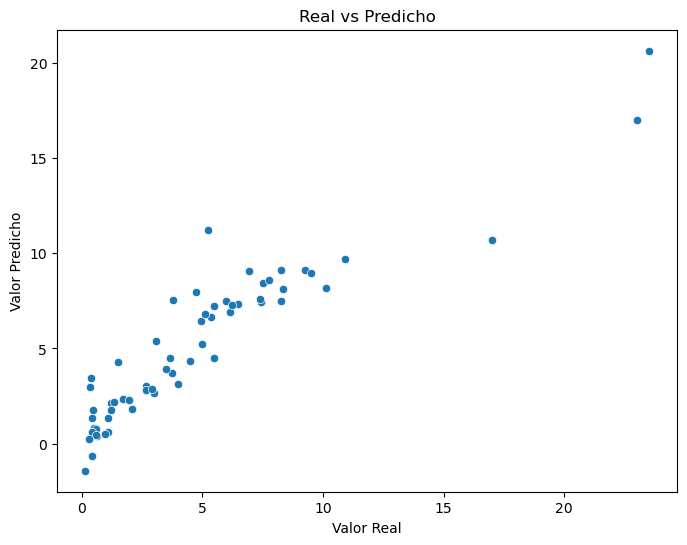

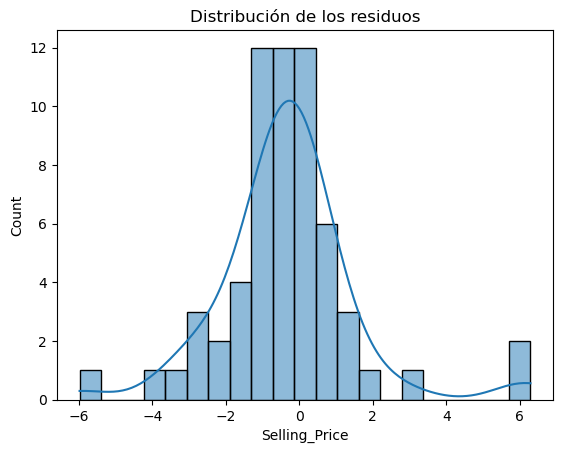

In [11]:
# Comparación real vs predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Real vs Predicho')
plt.show()

# Residuos
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.show()